In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

from plotly.subplots import make_subplots
import plotly.graph_objs as go

init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
result = pd.read_csv('results.csv')

In [3]:
result['date'] = pd.to_datetime(result['date'])
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40945 entries, 0 to 40944
Data columns (total 9 columns):
date          40945 non-null datetime64[ns]
home_team     40945 non-null object
away_team     40945 non-null object
home_score    40945 non-null int64
away_score    40945 non-null int64
tournament    40945 non-null object
city          40945 non-null object
country       40945 non-null object
neutral       40945 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.5+ MB


In [4]:
result['sum_goal'] = result['home_score'] + result['away_score']

In [5]:
result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,sum_goal
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,6
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3


In [6]:
def whowins(data):
    x,y,a,b = data
    if a>b:
        return x
    elif a<b:
        return y
    else:
        return 'draw'
# print (whowins(result[['home_team', 'away_team','home_score','away_score']]))
result['who wins'] = result[['home_team', 'away_team','home_score','away_score']].apply(whowins, axis = 1)
result['GD'] = abs(result['home_score'] - result['away_score'])
result.head()



,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,sum_goal,who wins,GD
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,6,England,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,Scotland,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4,draw,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,Scotland,3


In [7]:
result['year'] = result['date'].apply(lambda x : x.year)
GoalsPerYear = result.groupby('year').agg({'sum_goal':'sum'})
MatchPerYear = result.groupby('year').count()
MatchPerYear.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,sum_goal,who wins,GD
year,,,,,,,,,,,,
1872,1,1,1,1,1,1,1,1,1,1,1,1
1873,1,1,1,1,1,1,1,1,1,1,1,1
1874,1,1,1,1,1,1,1,1,1,1,1,1
1875,1,1,1,1,1,1,1,1,1,1,1,1
1876,2,2,2,2,2,2,2,2,2,2,2,2


In [8]:
fig = go.Figure()
# data = go.Scatter(x = GoalsPerYear.index, y = GoalsPerYear['sum_goal'], mode = 'lines+markers', name = 'Total Goal')
fig.add_trace(go.Scatter(x = GoalsPerYear.index, y = GoalsPerYear['sum_goal'], mode = 'lines+markers', name = 'Total Goal'))
fig.add_trace(go.Scatter(x = MatchPerYear.index, y = MatchPerYear['sum_goal'], mode = 'lines+markers', name = 'Total Match'))


# layout =go.Layout(title="Total Goals per Year")

# fig.update_layout(
#     title=go.layout.Title(
#         text="Plot Title",
#         xref="paper",
#         x=0
#     ),
#     xaxis=go.layout.XAxis(
#         title=go.layout.xaxis.Title(
#             text="x Axis",
#             font=dict(
#                 family="Courier New, monospace",
#                 size=18,
#                 color="#7f7f7f"
#             )
#         )
#     ),
#     yaxis=go.layout.YAxis(
#         title=go.layout.yaxis.Title(
#             text="y Axis",
#             font=dict(
#                 family="Courier New, monospace",
#                 size=18,
#                 color="#7f7f7f"
#             )
#         )
#     )
# )

# layout = go.Layout(
#     title=go.layout.Title(
#         text='Plot Title',
#         xref='paper',
#         x=0
#     ))
# fig = go.Figure(data = data, layout = layout)
fig.show()

In [9]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = GoalsPerYear.index, y = (result.groupby('year').median()['GD']), mode = 'lines+markers', name = 'median GD per year'))
# fig.add_trace(go.Scatter(x = GoalsPerYear.index, y = (result.groupby('year').max()['GD']), mode = 'lines+markers', name = 'Biggest GD per year'))
# fig.add_trace(go.Scatter(x = GoalsPerYear.index, y = (result.groupby('year').median()['sum_goal']), mode = 'lines+markers', name = 'GoalPerMatch'))


fig.show()

In [10]:
# result.groupby('who wins').count()
totalMatch1 = result.groupby('home_team').count()['year']
totalMatch2 = result.groupby('away_team').count()['year']
totalMatch = totalMatch1 + totalMatch2
totalMatch = totalMatch.sort_values(ascending = False)


neutralMatch1 = result[result['neutral'] == True].groupby('home_team').count()['year']
neutralMatch2 = result[result['neutral'] == True].groupby('away_team').count()['year']
neutralMatch = neutralMatch1 + neutralMatch2
neutralMatch = neutralMatch.sort_values(ascending = False)

# plt.figure(figsize = (12,8))
# plt.plot()

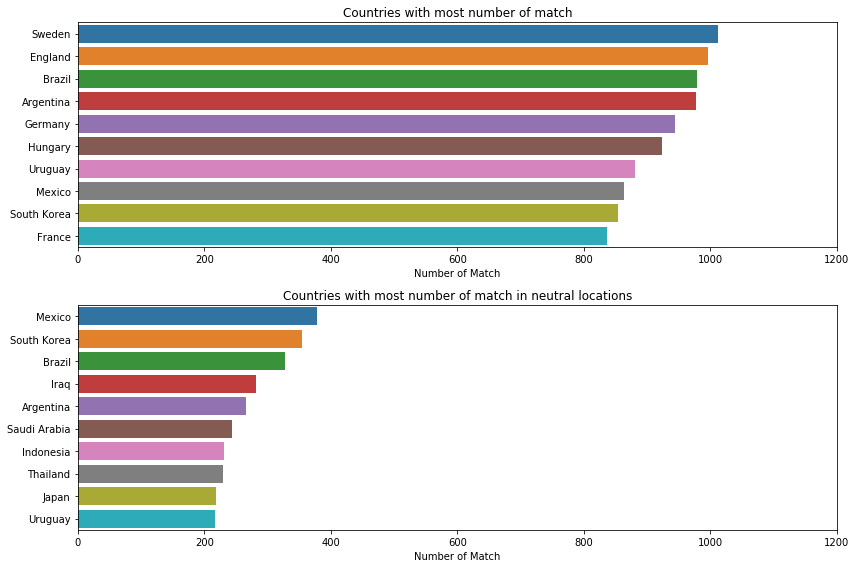

In [11]:
plt.figure(figsize = (12,8))
plt.subplot(2,1,1)
sns.barplot(y = totalMatch.head(10).index, x = totalMatch.head(10), orient = 'h')
plt.xlabel('Number of Match')
plt.title('Countries with most number of match')
plt.xlim(0,1200)
# plt.axis('equal')
plt.subplot(2,1,2)
sns.barplot(y = neutralMatch.head(10).index, x = neutralMatch.head(10), orient = 'h')
plt.xlabel('Number of Match')
plt.title('Countries with most number of match in neutral locations')
plt.xlim(0,1200)
# plt.axis('equal')
plt.tight_layout()

Text(0.5, 0, 'Highest win Percentage')

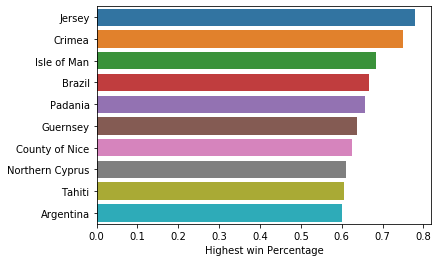

In [12]:
## country with most international win
neutralWin = result[result['neutral'] == True].groupby('who wins').count()['year']
neutralWin = neutralWin / neutralMatch
neutralWin = neutralWin.sort_values(ascending = False)

sns.barplot(y = neutralWin.head(10).index, x = neutralWin.head(10), orient = 'h')
plt.xlabel('Highest win Percentage')



In [13]:
result['tournament'].value_counts()

Friendly                                16967
FIFA World Cup qualification             7100
UEFA Euro qualification                  2482
African Cup of Nations qualification     1616
FIFA World Cup                            900
Copa América                              813
AFC Asian Cup qualification               724
African Cup of Nations                    690
CECAFA Cup                                620
CFU Caribbean Cup qualification           606
Merdeka Tournament                        503
British Championship                      501
AFC Asian Cup                             370
Island Games                              350
Gulf Cup                                  333
Gold Cup                                  327
AFF Championship                          293
COSAFA Cup                                292
UEFA Euro                                 286
Nordic Championship                       283
African Nations Championship              268
CFU Caribbean Cup                 

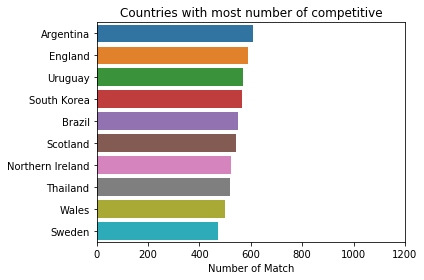

In [14]:
competitiveMatch1 = result[result['tournament'] != 'Friendly'].groupby('home_team').count()['year']
competitiveMatch2 = result[result['tournament'] != 'Friendly'].groupby('away_team').count()['year']
competitiveMatch = competitiveMatch1 + competitiveMatch2
competitiveMatch = competitiveMatch.sort_values(ascending = False)

sns.barplot(y = competitiveMatch.head(10).index, x = competitiveMatch.head(10), orient = 'h')
plt.xlabel('Number of Match')
plt.title('Countries with most number of competitive')
plt.xlim(0,1200)
# plt.axis('equal')
plt.tight_layout()

## 1. Indoensia's record in international football

In [15]:
indonesia = result[(result['home_team'] == 'Indonesia') | (result['away_team'] == 'Indonesia')]


In [16]:
indonesia['win'] = indonesia['who wins'].apply(lambda x : 1 if x == 'Indonesia' else 0)
indonesia['draw'] = indonesia['who wins'].apply(lambda x : 1 if x == 'draw' else 0)
indonesia['lose'] = indonesia['who wins'].apply(lambda x : 1 if (x != 'Indonesia')&(x != 'draw') else 0)
indonesiaYear = indonesia.groupby('year')
indonesiaYear.count().head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,sum_goal,who wins,GD,win,draw,lose
year,,,,,,,,,,,,,,,
1934,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1938,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1953,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1956,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
1957,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


In [17]:
indonesia.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,sum_goal,who wins,GD,year,win,draw,lose
1666,1934-05-13,Japan,Indonesia,1,7,Friendly,Manila,Philippines,True,8,Indonesia,6,1934,1,0,0
1667,1934-05-14,China PR,Indonesia,2,0,Friendly,Manila,Philippines,True,2,China PR,2,1934,0,0,1
1669,1934-05-19,Philippines,Indonesia,3,2,Friendly,Manila,Philippines,False,5,Philippines,1,1934,0,0,1
2091,1938-06-05,Hungary,Indonesia,6,0,FIFA World Cup,Reims,France,True,6,Hungary,6,1938,0,0,1
2111,1938-06-26,Netherlands,Indonesia,9,2,Friendly,Amsterdam,Netherlands,False,11,Netherlands,7,1938,0,0,1


In [18]:
plot = go.Scatter(x = indonesiaYear.count().index, y = indonesiaYear.count()['win'], mode = 'lines+markers', name = 'Indonesia-match')
layout = go.Layout(title = 'Match per year')
fig = go.Figure(data = [plot], layout = layout)
fig.show()

In [19]:
indonesiaWin = indonesiaYear.agg({'win' : 'sum', 'draw' : 'sum', 'lose' : 'sum'})
# plotMatch = go.Scatter(x = indonesiaYear.count().index, y = indonesiaYear.count()['win'], mode = 'lines+markers', name = 'Indonesia-match')

plotWin = go.Scatter(x = indonesiaWin.index, y = indonesiaWin['win'], mode = 'lines+markers', name = 'Indonesia-win')

plotDraw = go.Scatter(x = indonesiaWin.index, y = indonesiaWin['draw'], mode = 'lines+markers', name = 'Indonesia-draw')

plotLose = go.Scatter(x = indonesiaWin.index, y = indonesiaWin['lose'], mode = 'lines+markers', name = 'Indonesia-lose')


data = [plotWin, plotDraw, plotLose]
layout = go.Layout(title = 'Match per year')
fig = go.Figure(data = data, layout = layout)
fig.show()

In [20]:
indonesiaWin = indonesiaYear.agg({'win' : 'sum', 'draw' : 'sum', 'lose' : 'sum'})
# plotMatch = go.Scatter(x = indonesiaYear.count().index, y = indonesiaYear.count()['win'], mode = 'lines+markers', name = 'Indonesia-match')

plotWin = go.Bar(x = indonesiaWin.index, y = indonesiaWin['win'],  name = 'Indonesia-win')

plotDraw = go.Bar(x = indonesiaWin.index, y = indonesiaWin['draw'], name = 'Indonesia-draw')

plotLose = go.Bar(x = indonesiaWin.index, y = indonesiaWin['lose'], name = 'Indonesia-lose')


data = [plotWin, plotDraw, plotLose]
layout = go.Layout(title = 'Match per year', barmode = 'stack')
fig = go.Figure(data = data, layout = layout)
fig.show()

In [21]:
indonesiaWin = indonesiaYear.agg({'win' : 'sum', 'draw' : 'sum', 'lose' : 'sum'})
a = 15
# plotMatch = go.Scatter(x = indonesiaYear.count().index, y = indonesiaYear.count()['win'], mode = 'lines+markers', name = 'Indonesia-match')

plotWin = go.Bar(x = indonesiaWin.tail(a).index, y = indonesiaWin['win'].tail(a),  name = 'Indonesia-win')

plotDraw = go.Bar(x = indonesiaWin.tail(a).index, y = indonesiaWin['draw'].tail(a), name = 'Indonesia-draw')

plotLose = go.Bar(x = indonesiaWin.tail(a).index, y = indonesiaWin['lose'].tail(a), name = 'Indonesia-lose')


data = [plotWin, plotDraw, plotLose]
layout = go.Layout(title = 'Indonesia\'s match result in last {} years'.format(a), barmode = 'stack')
fig = go.Figure(data = data, layout = layout)
fig.show()

In [22]:
france = result[(result['home_team'] == 'France') | (result['away_team'] == 'France')]

france['win'] = france['who wins'].apply(lambda x : 1 if x == 'France' else 0)
france['draw'] = france['who wins'].apply(lambda x : 1 if x == 'draw' else 0)
france['lose'] = france['who wins'].apply(lambda x : 1 if (x != 'France')&(x != 'draw') else 0)
franceYear = france.groupby('year')
# franceYear.count().head()

franceWin = franceYear.agg({'win' : 'sum', 'draw' : 'sum', 'lose' : 'sum'})
a = 15
# plotMatch = go.Scatter(x = indonesiaYear.count().index, y = indonesiaYear.count()['win'], mode = 'lines+markers', name = 'Indonesia-match')

plotWin = go.Bar(x = franceWin.tail(a).index, y = franceWin['win'].tail(a),  name = 'France-win')

plotDraw = go.Bar(x = franceWin.tail(a).index, y = franceWin['draw'].tail(a), name = 'France-draw')

plotLose = go.Bar(x = franceWin.tail(a).index, y = franceWin['lose'].tail(a), name = 'France-lose')


data = [plotWin, plotDraw, plotLose]
layout = go.Layout(title = 'France\'s match result in last {} years'.format(a), barmode = 'stack')
fig = go.Figure(data = data, layout = layout)
fig.show()

In [23]:
def filterbycountry(country, year):
    france = result[(result['home_team'] == country) | (result['away_team'] == country)]

    france['win'] = france['who wins'].apply(lambda x : 1 if x == country else 0)
    france['draw'] = france['who wins'].apply(lambda x : 1 if x == 'draw' else 0)
    france['lose'] = france['who wins'].apply(lambda x : 1 if (x != country)&(x != 'draw') else 0)
    franceYear = france.groupby('year')
    # franceYear.count().head()

    franceWin = franceYear.agg({'win' : 'sum', 'draw' : 'sum', 'lose' : 'sum'})
    
    # plotMatch = go.Scatter(x = indonesiaYear.count().index, y = indonesiaYear.count()['win'], mode = 'lines+markers', name = 'Indonesia-match')

    plotWin = go.Bar(x = franceWin.tail(year).index, y = franceWin['win'].tail(year),  name = '{}-win'.format(country))

    plotDraw = go.Bar(x = franceWin.tail(year).index, y = franceWin['draw'].tail(year), name = '{}-draw'.format(country))

    plotLose = go.Bar(x = franceWin.tail(year).index, y = franceWin['lose'].tail(year), name = '{}-lose'.format(country))


    data = [plotWin, plotDraw, plotLose]
    layout = go.Layout(title = '{}\'s match result in last {} years'.format(country, year), barmode = 'stack')
    fig = go.Figure(data = data, layout = layout)
    fig.show()

In [24]:
filterbycountry('Japan', 20)

In [25]:
def filterbycountrynonfriendly(country, year):
    france = result[((result['home_team'] == country) | (result['away_team'] == country)) & (result['tournament'] != 'Friendly')]

    france['win'] = france['who wins'].apply(lambda x : 1 if x == country else 0)
    france['draw'] = france['who wins'].apply(lambda x : 1 if x == 'draw' else 0)
    france['lose'] = france['who wins'].apply(lambda x : 1 if (x != country)&(x != 'draw') else 0)
    franceYear = france.groupby('year')
    # franceYear.count().head()

    franceWin = franceYear.agg({'win' : 'sum', 'draw' : 'sum', 'lose' : 'sum'})
    
    # plotMatch = go.Scatter(x = indonesiaYear.count().index, y = indonesiaYear.count()['win'], mode = 'lines+markers', name = 'Indonesia-match')

    plotWin = go.Bar(x = franceWin.tail(year).index, y = franceWin['win'].tail(year),  name = '{}-win'.format(country))

    plotDraw = go.Bar(x = franceWin.tail(year).index, y = franceWin['draw'].tail(year), name = '{}-draw'.format(country))

    plotLose = go.Bar(x = franceWin.tail(year).index, y = franceWin['lose'].tail(year), name = '{}-lose'.format(country))


    data = [plotWin, plotDraw, plotLose]
    layout = go.Layout(title = '{}\'s match result in last {} years'.format(country, year), barmode = 'stack')
    fig = go.Figure(data = data, layout = layout)
    fig.show()

In [26]:
filterbycountrynonfriendly('Malaysia', 20)

In [27]:
result.to_csv('football.csv', index=True)

In [28]:
tes = go.Pie(labels = ['a','b','c'], values = [10,20,30],sort = False)
tos = go.Pie(labels = ['a','b','c'], values = [10,20,30],sort = False)
# fig = go.Figure(data = [tes])

# aaa = go.Figure(data=[tos])
# fig.show()
# aaa.show()

fig = tools.make_subplots(rows=1, cols=2)

fig.add_trace(tes, 1, 1)
fig.add_trace(tos, 1, 2)

fig['layout'].update(height=600, width=800, title='i <3 annotations and subplots')

fig.show()




NameError: name 'tools' is not defined

In [29]:
import plotly.figure_factory as ff
import plotly.graph_objs as go

import numpy as np

## Create first figure
x1,y1 = np.meshgrid(np.arange(0, 2, .2), np.arange(0, 2, .2))
u1 = np.cos(x1)*y1
v1 = np.sin(x1)*y1

fig1 = ff.create_quiver(x1, y1, u1, v1, name='Quiver')

## Create second figure
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
Y, X = np.meshgrid(x, y)
u = -1 - X**2 + Y
v = 1 + X - Y**2

fig2 = ff.create_streamline(x, y, u, v, arrow_scale=.1, name='Steamline')

for i in range(len(fig1.data)):
    fig1.data[i].xaxis='x1'
    fig1.data[i].yaxis='y1'

fig1.layout.xaxis1.update({'anchor': 'y1'})
fig1.layout.yaxis1.update({'anchor': 'x1', 'domain': [.55, 1]})

for i in range(len(fig2.data)):
    fig2.data[i].xaxis='x2'
    fig2.data[i].yaxis='y2'

# initialize xaxis2 and yaxis2
fig2['layout']['xaxis2'] = {}
fig2['layout']['yaxis2'] = {}

fig2.layout.xaxis2.update({'anchor': 'y2'})
fig2.layout.yaxis2.update({'anchor': 'x2', 'domain': [0, .45]})
# layout.yaxis({
#     'anchor': 'x2', 'domain': [0, 0.45]
# })

fig = go.Figure()
fig.add_traces([fig1.data[0], fig2.data[0]])

fig.layout.update(fig1.layout)
fig.layout.update(fig2.layout)

fig.show()

In [30]:
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter(
    x=[1, 2, 3],
    y=[4, 5, 6],
    mode='markers+text',
    text=['Text A', 'Text B', 'Text C'],
    textposition='bottom center'
)
trace2 = go.Scatter(
    x=[20, 30, 40],
    y=[50, 60, 70],
    mode='markers+text',
    text=['Text D', 'Text E', 'Text F'],
    textposition='bottom center'
)

fig = tools.make_subplots(rows=1, cols=2)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

fig['layout'].update(height=600, width=800, title='i <3 annotations and subplots')

fig.show()
# py.iplot(fig, filename='simple-subplot-with-annotations')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [31]:
import plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

labels = ['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen']
values = [[4500,2500,1053,500],[4600,2500,1053,500],[4500,2000,1053,500],[4500,2500,3053,500],[4500,2500,1053,1500]]
domains = [
    {'x': [0.0, 0.33], 'y': [0.0, 0.33]},
    {'x': [0.0, 0.33], 'y': [0.33, 0.66]},
    {'x': [0.0, 0.33], 'y': [0.66, 1.0]},
    {'x': [0.33, 0.66], 'y': [0.0, 0.33]},
    {'x': [0.66, 1.0], 'y': [0.0, 0.33]},
#     {'x': [0.33, 1.0], 'y': [0.33, 1.0]}
]
traces = []
count = 0
for domain in domains:
    trace = go.Pie(labels = labels,
                   values = values[count],
                   domain = domain,
                   hoverinfo = 'label+percent+name')
    traces.append(trace)
    count += 1

layout = go.Layout(height = 600,
                   width = 600,
                   autosize = False,
                   title = 'Main title')
fig = go.Figure(data = traces, layout = layout)
py.iplot(fig, show_link = False)

In [32]:
result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,sum_goal,who wins,GD,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,0,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,6,England,2,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,Scotland,1,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4,draw,0,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,Scotland,3,1876


In [51]:
def countryrecord(country):
    negara = result[((result['home_team'] == country) | (result['away_team'] == country))]
    
    negara['win'] = negara['who wins'].apply(lambda x : 1 if x == country else 0)
    negara['draw'] = negara['who wins'].apply(lambda x : 1 if x == 'draw' else 0)
    negara['lose'] = negara['who wins'].apply(lambda x : 1 if (x != country)&(x != 'draw') else 0)
    
    negaraHome = negara[(negara['home_team'] == country) & (negara['neutral'] == False)]
    negaraNeutral = negara[negara['neutral'] == True]
    negaraAway = negara[(negara['away_team'] == country) & (negara['neutral'] == False)]
    
    columnNegara = {'home' : negaraHome, 'neutral' : negaraNeutral, 'away' :negaraAway}
    
    traces = []
    x = 0
    for i in columnNegara.keys():
        labels = ['win', 'draw',' lose']
        values = [columnNegara[i]['win'].sum(),
                 columnNegara[i]['draw'].sum(),
                 columnNegara[i]['lose'].sum()]
        domain = {'x' : [x , x+0.3], 'y' : [0.1 , 1] }
        trace = go.Pie(labels = labels,
                   values = values,
                   domain = domain,
                   sort = False,
                   hoverinfo = 'label+percent+name', title = i + ' record\n')
        traces.append(trace)
        x += 0.33
        
    layout = go.Layout(height = 600,
                   width = 1000,
                   autosize = False,
                   margin = {'pad' : 10},
                   title = 'Main\ntitle', titlefont = {'size':30})
    fig = go.Figure(data = traces, layout = layout)
    fig.show()
    
        
    
    
    
    


In [52]:
countryrecord('Indonesia')

In [57]:
import datetime as dt
dt.datetime.now()

TypeError: 'datetime.datetime' object is not subscriptable

In [58]:
result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,sum_goal,who wins,GD,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,0,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,6,England,2,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,Scotland,1,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4,draw,0,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,Scotland,3,1876


In [88]:
def fiercerival(country):
    negara = result[((result['home_team'] == country) | (result['away_team'] == country))]
    
    negara['win'] = negara['who wins'].apply(lambda x : 1 if x == country else 0)
    negara['draw'] = negara['who wins'].apply(lambda x : 1 if x == 'draw' else 0)
    negara['lose'] = negara['who wins'].apply(lambda x : 1 if (x != country)&(x != 'draw') else 0)
    
    daftarRival = (negara['home_team'].value_counts() + negara['away_team'].value_counts()).sort_values(ascending = False)[1:6] 
    isi = []
    for i in daftarRival.index:
        rival = negara[(negara['home_team'] == i) | (negara['away_team'] == i)]
        isi.append([i,rival['win'].sum(),rival['draw'].sum(),rival['lose'].sum()])
#         go.Bar(x = franceWin.tail(year).index, y = franceWin['win'].tail(year),  name = '{}-win'.format(country))
    isi = pd.DataFrame(isi, columns = ['rival', 'win', 'draw','lose'])#.sort_values(by = 'win', ascending = False)   
    
    plotWin = go.Bar(x = isi['rival'], y = isi['win'],  name = '{}-win'.format(country))

    plotDraw = go.Bar(x = isi['rival'], y = isi['draw'], name = '{}-draw'.format(country))

    plotLose = go.Bar(x = isi['rival'], y = isi['lose'], name = '{}-lose'.format(country))


    data = [plotWin, plotDraw, plotLose]
    layout = go.Layout(title = '{}\'s match result in last {} years'.format(country,'aa'), barmode = 'stack')
    fig = go.Figure(data = data, layout = layout)
    fig.show()
    
    
    
#     negaraHome = negara[(negara['home_team'] == country) & (negara['neutral'] == False)]
#     negaraNeutral = negara[negara['neutral'] == True]
#     negaraAway = negara[(negara['away_team'] == country) & (negara['neutral'] == False)]
    
#     columnNegara = {'home' : negaraHome, 'neutral' : negaraNeutral, 'away' :negaraAway}
    
    
    
#     traces = []

In [85]:
fiercerival('Switzerland')

In [79]:
fiercerival('Switzerland')

In [93]:
fiercerival('South Korea')

In [98]:
indonesia.tail(40)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,sum_goal,who wins,GD,year,win,draw,lose
36273,2014-09-09,Indonesia,Yemen,0,0,Friendly,Yogyakarta,Indonesia,False,0,draw,0,2014,0,1,0
36295,2014-09-14,Indonesia,Malaysia,2,0,Friendly,Sidoarjo,Indonesia,False,2,Indonesia,2,2014,1,0,0
36297,2014-09-25,Indonesia,Cambodia,1,0,Friendly,Malang,Indonesia,False,1,Indonesia,1,2014,1,0,0
36497,2014-11-15,Indonesia,Syria,0,2,Friendly,Jakarta,Indonesia,False,2,Syria,2,2014,0,0,1
36576,2014-11-22,Vietnam,Indonesia,2,2,AFF Championship,Hanoi,Vietnam,False,4,draw,0,2014,0,1,0
36581,2014-11-25,Philippines,Indonesia,4,0,AFF Championship,Hanoi,Vietnam,True,4,Philippines,4,2014,0,0,1
36586,2014-11-28,Indonesia,Laos,5,1,AFF Championship,Hanoi,Vietnam,True,6,Indonesia,4,2014,1,0,0
36726,2015-03-25,Indonesia,Cameroon,0,1,Friendly,Sidoarjo,Indonesia,False,1,Cameroon,1,2015,0,0,1
36794,2015-03-30,Indonesia,Burma,2,1,Friendly,Sidoarjo,Indonesia,False,3,Indonesia,1,2015,1,0,0
38240,2016-09-06,Indonesia,Malaysia,3,0,Friendly,Surakarta,Indonesia,False,3,Indonesia,3,2016,1,0,0
